# Проект: Линейные модели в машинном обучении

## 1 Вводная часть

### 1.1 Описание проекта

***ЗАКАЗЧИК:*** Фермер, владелец молочного хозяйства «Вольный луг»

***ЦЕЛЬ БИЗНЕСА:*** Расширить поголовье коров стада с учетом требований: удой не менее 6000 килограммой молоса в год; надой должен быть вкусным — строго по критериям молочного хозяйства «Вольный луг», ничуть не хуже. Заключен контракт с ассоциацией пастбищ «ЭкоФерма».

***ЗАДАЧА МАШИННОГО ОБУЧЕНИЯ:*** создать две прогнозные модели для отбора бурёнок в поголовье:
   - Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
   - Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
    
    С помощью модели нужно отобрать коров по двум критериям:
        - средний удой за год — не менее 6000 килограммов;
        - молоко должно быть вкусным

### 1.2 Описание данных

**Три датасета:**

Данные о стаде фермера на текущий момент - **ferma_main.csv**
   - **id** - уникальный идентификатор коровы
   - **Удой, кг** - масса молока, которую корова даёт в год (в килограммах)
   - **ЭКЕ (Энергетическая кормовая единица)** — показатель питательности корма коровы
   - **Сырой протеин, г** — содержание сырого протеина в корме (в граммах)
   - **СПО (Сахаро-протеиновое соотношение)** — отношение сахара к протеину в корме коровы
   - **Порода** — порода коровы
   - **Тип пастбища** — ландшафт лугов, на которых паслась корова
   - **порода папы_быка** — порода папы коровы
   - **Жирность,%** — содержание жиров в молоке (в процентах)
   - **Белок,%** — содержание белков в молоке (в процентах)
   - **Вкус молока** — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно)
   - **Возраст** — возраст коровы, бинарный признак (менее_2_лет, более_2_лет)

Имя папы каждой коровы в стаде фермера - **ferma_dad.csv**
   - **id** — уникальный идентификатор коровы
   - **Имя Папы** — имя папы коровы

Данные о коровах «ЭкоФермы», которых необходимо изучить перед покупкой - **cow_buy.csv**
   - **Порода** — порода коровы
   - **Тип пастбища** — ландшафт лугов, на которых паслась корова
   - **порода папы_быка** — порода папы коровы
   - **Имя_папы** — имя папы коровы
   - **Текущая_жирность,%** — содержание жиров в молоке (в процентах)
   - **Текущий_уровень_белок,%** — содержание белков в молоке (в процентах)
   - **Возраст** — возраст коровы, бинарный признак (менее_2_лет, более_2_лет)
   
    Датасет cow_buy.csv имеет несколько особенностей:
    - Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
    - Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
    - Отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!   


### 1.3 Цель проекта

Разработать две модели машинного обучения, которые помогут владелецу молочного хозяйства «Вольный луг» управлять рисками и принимать объективное решение о покупке буренок у ассоциации пастбищ «ЭкоФерма»:
- Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью моделей отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

### 1.4 План проекта

1. Загрузка и изучение данных полученных датафреймов;
2. Предобработка данных:
    - Обработка пропусков и дубликатов;
    - Преобразование типов данных;
    - Устранение прочих проблем с данными.
3. Исследовательский анализ данных:
    - Статистический анализ всех признаков;
    - Анализ графиков для каждого признака.
4. Корреляционный анализ признаков в датасете ferma_main.csv:
   - Расчет коэффициентов корреляции между всеми признаками;
   - Построение диаграммы рассеяния для признака *Удой, кг* и всех количественных признаков с учётом значения категориальных признаков.
5. Задача регрессии:
    - Обучение первой модели простой линейной регрессии;
    - Обучение второй модели простой линейной регрессии;
    - Обучение третьей модели простой линейной регрессии.
6. Задача классификации:
    - Подготовка данных и обучение модели логистической регрессии;
    - Анализ модели логистической регрессии;
    - Прогнозирование вкуса молока.
7. Итоговые выводы

## 2 Загрузка данных

## 2.1 Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (
    r2_score, 
    mean_squared_error,
    mean_absolute_error,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix
)

## 2.2 Общая информация о данных

In [2]:
df_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal = ',')
df_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [3]:
df_main.shape[0]

634

In [4]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

**ВЫВОД:**

1. Датафрейм, содержащий данные о стаде фермера содержит 634 строки;
2. Требуется переименовать названия столбцов (привести к нижнему регистру, одному языку, отсутствию пробелов);
3. Пропусков нет;
4. Тип данных в столбцах указаны корректно.


In [5]:
df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
df_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [6]:
df_dad.shape[0]

629

In [7]:
df_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


**ВЫВОД:**

1. Датафрейм, содержащий данные об именах папы каждой коровы в стаде фермера содержит 629 строк;
2. Требуется переименовать названия столбцов (привести к нижнему регистру, одному языку, отсутствию пробелов);
3. Пропусков нет;
4. Изменение типов данных не требуется.

In [8]:
df_cow_boy = pd.read_csv('/datasets/cow_buy.csv', sep = ';', decimal = ',')
df_cow_boy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [9]:
df_cow_boy.shape[0]

20

In [10]:
df_cow_boy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


**ВЫВОД:**

1. Датафрейм, содержащий данные о коровах «ЭкоФермы» содержит 20 строк;
2. Требуется переименовать названия столбцов (привести к нижнему регистру, одному языку, отсутствию пробелов);
3. Пропусков нет;
4. Тип данных в столбцах указаны корректно.


##  3 Предобработка данных

### 3.1 Замена названий столбцов (приведение к нижнему регистру, одному языку, отсутствию пробелов)

Чтобы избежать ошибок при работе с данными, столбцы в трех датафреймах будут переименованы.

In [11]:
df_main.columns = (
    ['id',
     'milk_yield',
     'energy_feed_unit', 
     'raw_protein', 
     's_p_ratio', 
     'breed', 
     'type_of_pasture', 
     'breed_dad_bull', 
     'fat_content', 
     'protein', 
     'taste_of_milk', 
     'age']
)
df_main.head()

,id,milk_yield,energy_feed_unit,raw_protein,s_p_ratio,breed,type_of_pasture,breed_dad_bull,fat_content,protein,taste_of_milk,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [12]:
df_dad.columns = ['id', 'name_dad_bull']
df_dad.head()

,id,name_dad_bull
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [13]:
df_cow_boy.columns = (
    ['cb_breed', 
     'cb_type_of_pasture', 
     'cb_breed_dad_bull', 
     'cb_name_dad_bull', 
     'current_fat_content', 
     'current_protein', 'cb_age']
)
df_cow_boy.head()

,cb_breed,cb_type_of_pasture,cb_breed_dad_bull,cb_name_dad_bull,current_fat_content,current_protein,cb_age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


### 3.3 Проверка на дубликаты

#### 3.3.1 Проверка на явные дубликаты


In [14]:
def obv_duplicates(df):
    result1 = df.duplicated().sum()
    df_new = df.drop_duplicates()
    result2 = df_new.shape[0]
    print(f'Количество явных дубликатов в датафрейме: {result1}\nКоличество строк после удаления явных дубликтов: {result2}')
    return df_new

In [15]:
df_main = obv_duplicates(df_main)

Количество явных дубликатов в датафрейме: 5
Количество строк после удаления явных дубликтов: 629


In [16]:
df_cow_boy = obv_duplicates(df_cow_boy)

Количество явных дубликатов в датафрейме: 4
Количество строк после удаления явных дубликтов: 16


**ВЫВОД:**

1. В датафрейме с даннымии о стаде фермера 5 явных дубликатов. После их удаления число строк - 629; 
2. В датафрейм с даннымии о коровах «ЭкоФермы» 4 явных дубликата. После их удаления число строк - 16.

#### 3.3.2 Проверка на неявные дубликаты

Проверим столбцы с текстовыми значениями в  датафрейме с даннымии о стаде фермера:

In [17]:
df_columns = ['breed', 'type_of_pasture', 'taste_of_milk', 'age', 'breed_dad_bull']

for i in df_columns:
    print(df_main[i].value_counts(),'\n')

Вис Бик Айдиал     373
РефлешнСоверинг    256
Name: breed, dtype: int64 

Холмистое    351
Равнинное    253
Равнинные     25
Name: type_of_pasture, dtype: int64 

вкусно       371
не вкусно    258
Name: taste_of_milk, dtype: int64 

более_2_лет    519
менее_2_лет    110
Name: age, dtype: int64 

Соверин    311
Айдиал     240
Айдиалл     78
Name: breed_dad_bull, dtype: int64 



В столбцах ***type_of_pasture*** (тип пастбища) и ***breed_dad_bull*** (порода папы быка) обнаружены неявные дубликаты. Исправим написание значений в столбцах.

In [18]:
df_main['type_of_pasture'] = df_main['type_of_pasture'].replace('Равнинные', 'Равнинное')
df_main['breed_dad_bull'] = df_main['breed_dad_bull'].replace('Айдиалл', 'Айдиал')

In [19]:
df_columns = ['type_of_pasture', 'breed_dad_bull']

for i in df_columns:
    print(df_main[i].value_counts(),'\n')

Холмистое    351
Равнинное    278
Name: type_of_pasture, dtype: int64 

Айдиал     318
Соверин    311
Name: breed_dad_bull, dtype: int64 



Проверим, не появились ли явные дубликаты после изменений значений в столбцах.

In [20]:
df_main = obv_duplicates(df_main)

Количество явных дубликатов в датафрейме: 0
Количество строк после удаления явных дубликтов: 629


In [21]:
df_dad['name_dad_bull'].value_counts()

Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: name_dad_bull, dtype: int64

Теперь проверим столбцы с текстовыми значениями в  датафрейме с даннымии о коровах «ЭкоФермы»:

In [22]:
df_columns = ['cb_breed', 'cb_type_of_pasture', 'cb_breed_dad_bull', 'cb_name_dad_bull', 'cb_age']

for i in df_columns:
    print(df_cow_boy[i].value_counts(),'\n')

РефлешнСоверинг    8
Вис Бик Айдиал     8
Name: cb_breed, dtype: int64 

равнинное    8
холмистое    8
Name: cb_type_of_pasture, dtype: int64 

Соверин    10
Айдиал      6
Name: cb_breed_dad_bull, dtype: int64 

Буйный      7
Геркулес    5
Барин       2
Соловчик    2
Name: cb_name_dad_bull, dtype: int64 

более_2_лет    11
менее_2_лет     5
Name: cb_age, dtype: int64 



In [23]:
df_cow_boy['cb_type_of_pasture'] = df_cow_boy['cb_type_of_pasture'].replace('равнинное', 'Равнинное')
df_cow_boy['cb_type_of_pasture'] = df_cow_boy['cb_type_of_pasture'].replace('холмистое', 'Холмистое')

Неявные дубликаты не обнаружены

**ВЫВОД:**

1. В датафрейме с даннымии о стаде фермера обнаружены  неявные дубликаты. Значения исправлены; 
2. В датафрейм с даннымии о коровах «ЭкоФермы» нет неявных дубликатов. 

**ВЫВОД ПО ПРЕДОБРАБОТКЕ ДАННЫХ:**

- Проведена замена наименований столбцов (приведение к нижнему регистру, одному языку, отсутствию пробелов);


- Объединены данные о стаде фермера и данные об именах папы каждой коровы в один датафрейм;


- Проведена проверка на явные дубликаты: 

      В датафрейме с даннымии о стаде фермера 5 явных дубликатов. После их удаления число строк - 629;
      В датафрейм с даннымии о коровах «ЭкоФермы» 4 явных дубликата. После их удаления число строк - 16.
    
    
- Проведена проверка на неявные дубликаты:  

      В датафрейме с даннымии о стаде фермера обнаружены  неявные дубликаты. Значения исправлены; 
      В датафрейм с даннымии о коровах «ЭкоФермы» нет неявных дубликатов.


- Пропусков нет;


- Типы данных в столбцах указаны корректно.

## 4. Исследовательский анализ данных

In [24]:
df_main.head()

,id,milk_yield,energy_feed_unit,raw_protein,s_p_ratio,breed,type_of_pasture,breed_dad_bull,fat_content,protein,taste_of_milk,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [25]:
df_main.describe()

,id,milk_yield,energy_feed_unit,raw_protein,s_p_ratio,fat_content,protein
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Построим графики для каждого признака.

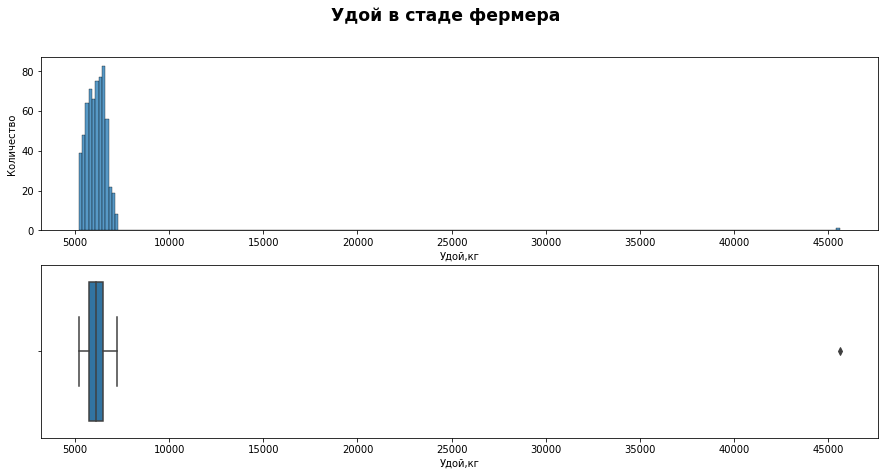

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize = (15,7))

sns.histplot(data = df_main, x = 'milk_yield', ax=axs[0])
axs[0].set(xlabel = 'Удой,кг')
axs[0].set(ylabel = 'Количество')

sns.boxplot(data = df_main, x = 'milk_yield', ax=axs[1])
axs[1].set(xlabel = 'Удой,кг')


fig.suptitle('Удой в стаде фермера', fontsize = 'xx-large', fontweight = 600)

plt.show()

Обнаружен выброс. Значение 45616. Удалим его.

In [27]:
df_main = df_main[df_main['milk_yield']<= 10000]

In [28]:
df_main.shape

(628, 12)

In [29]:
df_main['milk_yield'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: milk_yield, dtype: float64

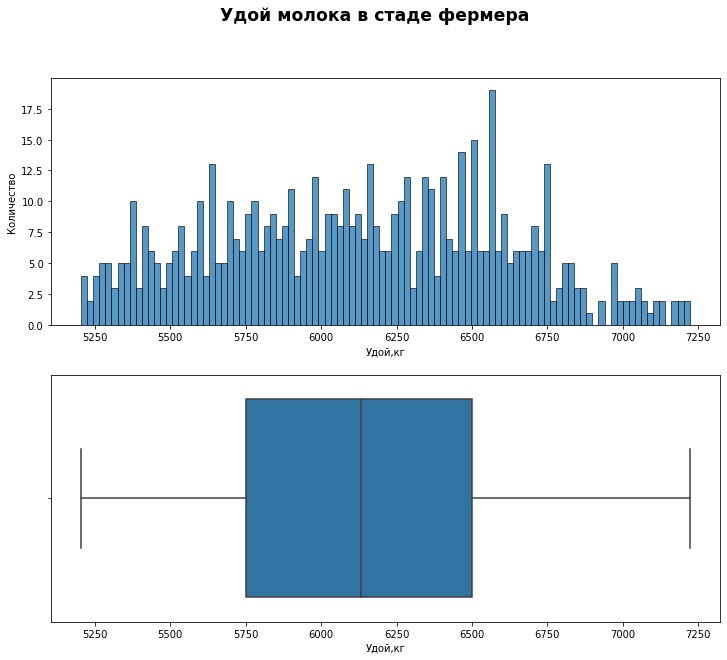

In [30]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize = (12,10))

sns.histplot(data = df_main, x = 'milk_yield', ax=axs[0], bins = 100)
axs[0].set(xlabel = 'Удой,кг')
axs[0].set(ylabel = 'Количество')

sns.boxplot(data = df_main, x = 'milk_yield', ax=axs[1])
axs[1].set(xlabel = 'Удой,кг')


fig.suptitle('Удой молока в стаде фермера', fontsize = 'xx-large', fontweight = 600)

plt.show()

**ВЫВОД:**

Удой в стаде фермера на колеблется на уровне 5750 - 6501 кг. Медианное значение - 6132.5 кг. 

In [31]:
df_main['energy_feed_unit'].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: energy_feed_unit, dtype: float64

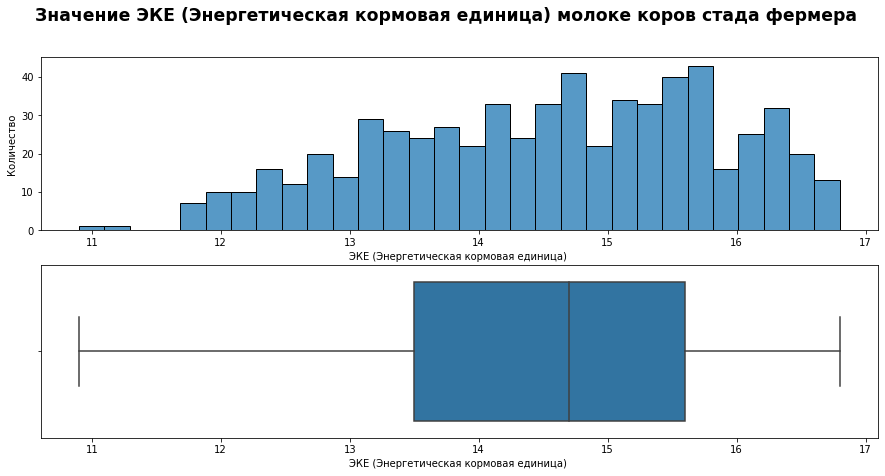

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize = (15,7))

sns.histplot(data = df_main, x = 'energy_feed_unit', ax=axs[0], bins = 30)
axs[0].set(xlabel = 'ЭКЕ (Энергетическая кормовая единица) ')
axs[0].set(ylabel = 'Количество')

sns.boxplot(data = df_main, x = 'energy_feed_unit', ax=axs[1])
axs[1].set(xlabel = 'ЭКЕ (Энергетическая кормовая единица) ')


fig.suptitle('Значение ЭКЕ (Энергетическая кормовая единица) молоке коров стада фермера', fontsize = 'xx-large', fontweight = 600)

plt.show()

**ВЫВОД:**

ЭКЕ (Энергетическая кормовая единица) в стаде фермера 13.5 - 15.6. Медианное значение - 14.7. Выбросов нет.

In [33]:
df_main['raw_protein'].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: raw_protein, dtype: float64

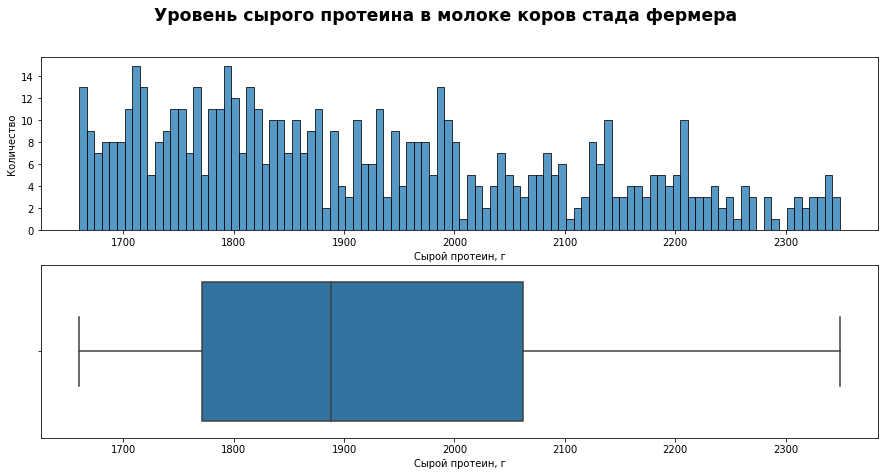

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize = (15,7))

sns.histplot(data = df_main, x = 'raw_protein', ax=axs[0], bins = 100)
axs[0].set(xlabel = 'Сырой протеин, г')
axs[0].set(ylabel = 'Количество')

sns.boxplot(data = df_main, x = 'raw_protein', ax=axs[1])
axs[1].set(xlabel = 'Сырой протеин, г')


fig.suptitle('Уровень сырого протеина в молоке коров стада фермера', fontsize = 'xx-large', fontweight = 600)

plt.show()

**ВЫВОД:**

Уровень сырого протеина в молоке в стаде фермера находится в диапазоне 1771.7 - 2062.2 г. Медианное значение - 1888. Выбросов нет.

In [35]:
df_main['s_p_ratio'].describe()

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: s_p_ratio, dtype: float64

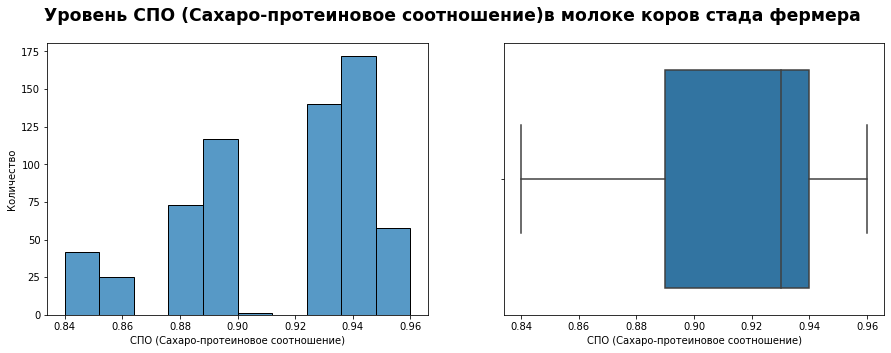

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

sns.histplot(data = df_main, x = 's_p_ratio', ax=axs[0], bins = 10)
axs[0].set(xlabel = 'СПО (Сахаро-протеиновое соотношение)')
axs[0].set(ylabel = 'Количество')

sns.boxplot(data = df_main, x = 's_p_ratio', ax=axs[1])
axs[1].set(xlabel = 'СПО (Сахаро-протеиновое соотношение)')


fig.suptitle('Уровень СПО (Сахаро-протеиновое соотношение)в молоке коров стада фермера', fontsize = 'xx-large', fontweight = 600)

plt.show()

**ВЫВОД:**

Уровень СПО (Сахаро-протеиновое соотношение)в молоке коров стада фермера находится в диапазоне 0.89 - 0.94. Медианное значение - 0.93. Выбросов нет.

In [37]:
df_main['fat_content'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_content, dtype: float64

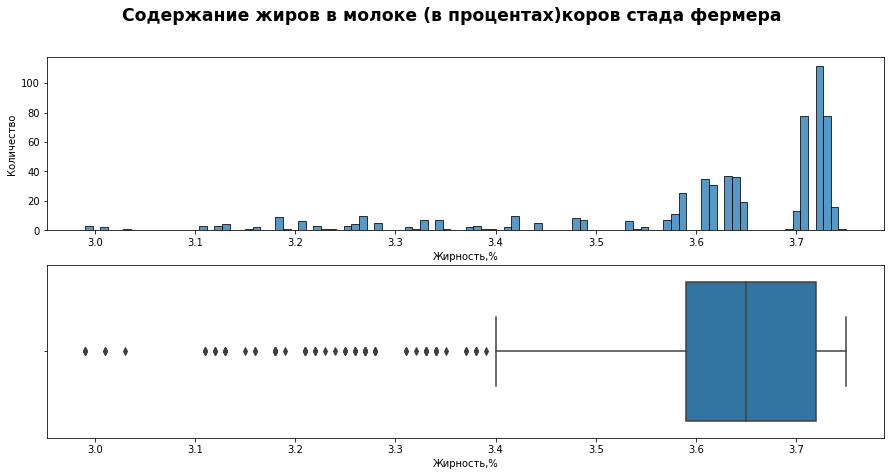

In [38]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize = (15,7))

sns.histplot(data = df_main, x = 'fat_content', ax=axs[0], bins = 100)
axs[0].set(xlabel = 'Жирность,%')
axs[0].set(ylabel = 'Количество')

sns.boxplot(data = df_main, x = 'fat_content', ax=axs[1])
axs[1].set(xlabel = 'Жирность,%')


fig.suptitle('Содержание жиров в молоке (в процентах)коров стада фермера', fontsize = 'xx-large', fontweight = 600)

plt.show()

**ВЫВОД:**

Содержание жиров в молоке коров стада фермера находится в диапазоне 3.59 - 3.72 %. Медианное значение - 3.65%. Много значений от 3%. Однако, исключать их не будем, т.к. более низкие показатель жирности молока у достаточно большого числа коров влияют на итоговый показатель качества молока фермы.

In [39]:
df_main['protein'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein, dtype: float64

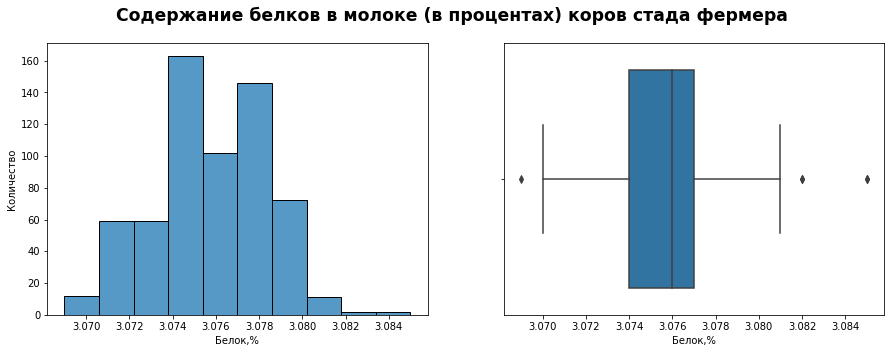

In [40]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

sns.histplot(data = df_main, x = 'protein', ax=axs[0], bins = 10)
axs[0].set(xlabel = 'Белок,%')
axs[0].set(ylabel = 'Количество')

sns.boxplot(data = df_main, x = 'protein', ax=axs[1])
axs[1].set(xlabel = 'Белок,%')


fig.suptitle('Содержание белков в молоке (в процентах) коров стада фермера', fontsize = 'xx-large', fontweight = 600)

plt.show()

**ВЫВОД:**

Содержание белков в молоке коров стада фермера имеет медианное значение - 3.076 %. Разброс значений не велик. Оставим без изменений.

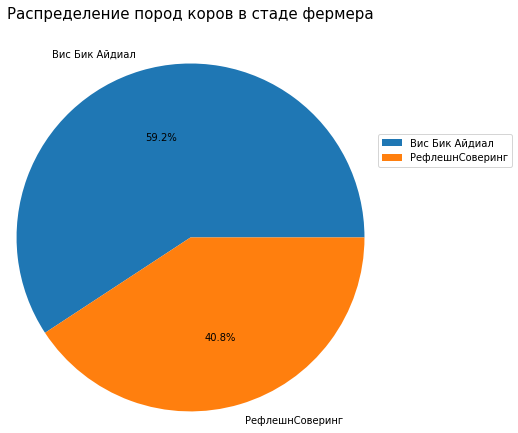

In [41]:
df_main['breed'].value_counts().plot(y = 'breed', kind = 'pie', radius = 2,  autopct='%1.1f%%')


plt.title('Распределение пород коров в стаде фермера', fontsize=15, pad=110)
plt.legend(bbox_to_anchor=(2,1))
plt.ylabel(' ')
plt.show()

**ВЫВОД:**

Порода Вис Бик Айдиал в стаде фермера представлена на 20% больше, чем Рефлешн Соверинг.

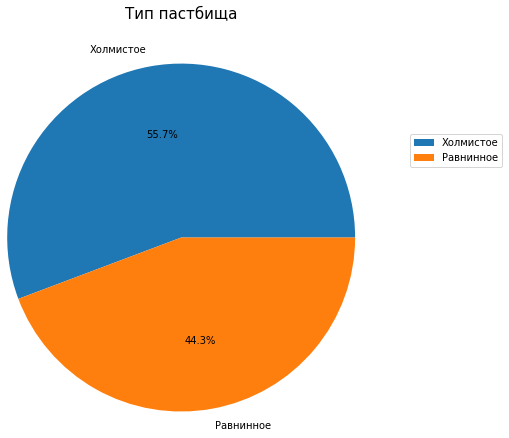

In [42]:
df_main['type_of_pasture'].value_counts().plot(y = 'type_of_pasture', kind = 'pie', radius = 2,  autopct='%1.1f%%')


plt.title('Тип пастбища', fontsize=15, pad=110)
plt.legend(bbox_to_anchor=(2,1))
plt.ylabel(' ')
plt.show()

**ВЫВОД:**

На холмистых пастбищах паслось на 10% больше коров, чем на равнинных.

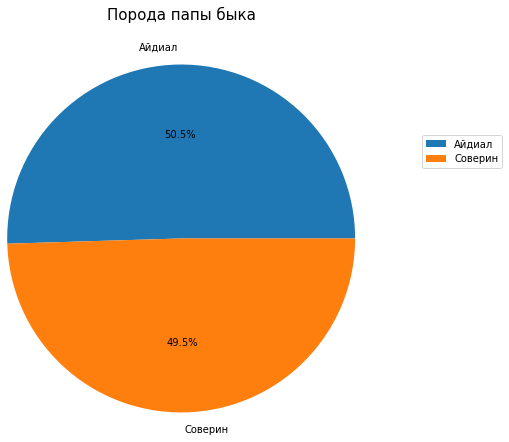

In [43]:
df_main['breed_dad_bull'].value_counts().plot(y = 'breed_dad_bull', kind = 'pie', radius = 2,  autopct='%1.1f%%')


plt.title('Порода папы быка', fontsize=15, pad=110)
plt.legend(bbox_to_anchor=(2,1))
plt.ylabel(' ')
plt.show()

**ВЫВОД:**

Распределение по породам папы быка 50 на 50.

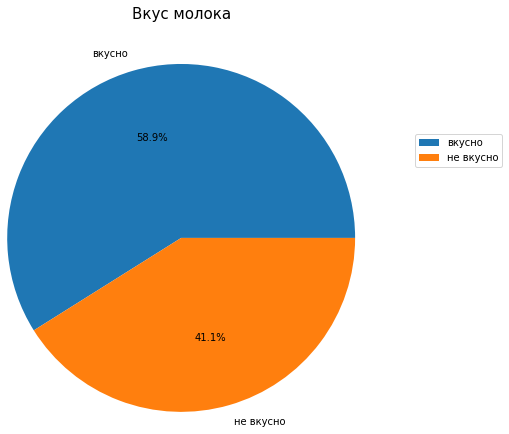

In [44]:
df_main['taste_of_milk'].value_counts().plot(y = 'taste_of_milk', kind = 'pie', radius = 2,  autopct='%1.1f%%')


plt.title('Вкус молока', fontsize=15, pad=110)
plt.legend(bbox_to_anchor=(2,1))
plt.ylabel(' ')
plt.show()

**ВЫВОД:**

Фермер оценил 60% коров, как дающих вкусное молоко, 40% - не вкусное.

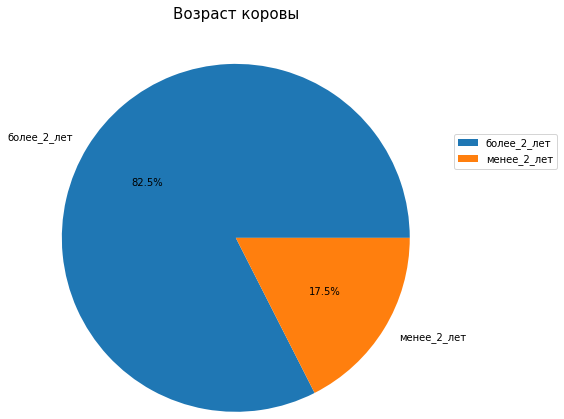

In [45]:
df_main['age'].value_counts().plot(y = 'age', kind = 'pie', radius = 2,  autopct='%1.1f%%')


plt.title('Возраст коровы', fontsize=15, pad=110)
plt.legend(bbox_to_anchor=(2,1))
plt.ylabel(' ')
plt.show()

**ВЫВОД:**

В стаде фермера 82,5% коров старше 2 лет.

**ВЫВОД ПО ИССЛЕДОВАТЕЛЬСКОМУ АНАЛИЗУ ДАННЫХ:**

- Удой в стаде фермера на колеблется на уровне 5750 - 6501 кг. Медианное значение - 6132.5 кг. Выброс удален.
- ЭКЕ (Энергетическая кормовая единица) в стаде фермера 13.5 - 15.6. Медианное значение - 14.7. Выбросов нет.
- Уровень сырого протеина в молоке в стаде фермера находится в диапазоне 1771.7 - 2062.2 г. Медианное значение - 1888. Выбросов нет.
- Уровень СПО (Сахаро-протеиновое соотношение)в молоке коров стада фермера находится в диапазоне 0.89 - 0.94. Медианное значение - 0.93. Выбросов нет.
- Содержание жиров в молоке коров стада фермера находится в диапазоне 3.59 - 3.72 %. Медианное значение - 3.65%. Много значений от 3%. Однако, исключать их не будем, т.к. более низкие показатель жирности молока у достаточно большого числа коров влияют на итоговый показатель качества молока фермы.
- Содержание белков в молоке коров стада фермера имеет медианное значение - 3.076 %. Разброс значений не велик. Оставим без изменений.
- Порода Вис Бик Айдиал в стаде фермера представлена на 20% больше, чем Рефлешн Соверинг.
- На холмистых пастбищах паслось на 10% больше коров, чем на равнинных.
- Распределение по породам папы быка 50 на 50.
- Фермер оценил 60% коров, как дающих вкусное молоко, 40% - не вкусное.
- В стаде фермера 82,5% коров старше 2 лет.

## 5. Корреляционный анализ

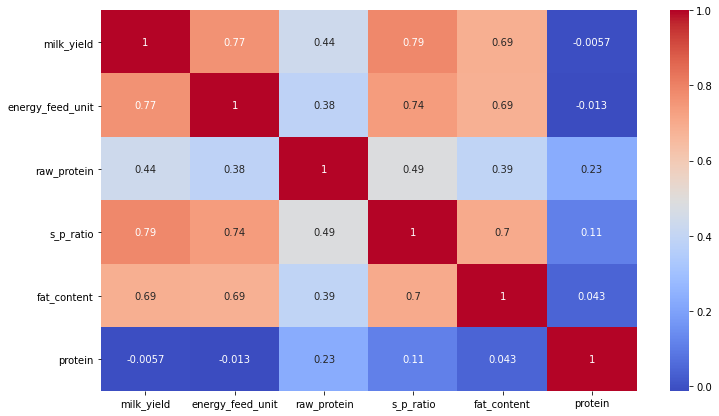

In [46]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_main.loc[ : ,df_main.columns != 'id'].corr(method='spearman'), cmap='coolwarm', annot=True)
plt.show()

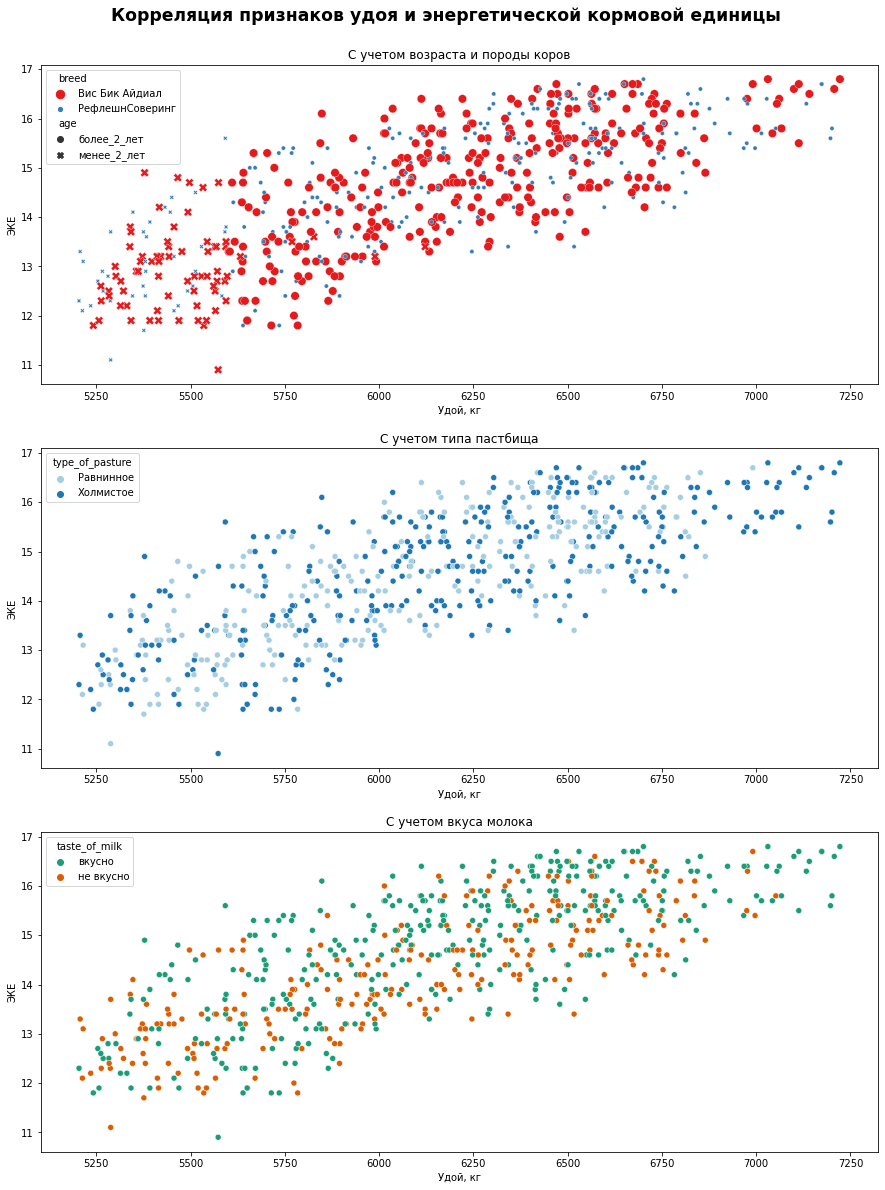

In [47]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize = (15,20))

sns.scatterplot(
    data = df_main,
    x = 'milk_yield',
    y = 'energy_feed_unit',
    hue = 'breed',
    size = 'breed',
    style = 'age',
    palette = 'Set1',
    ax=axs[0]
)
axs[0].set(title = 'C учетом возраста и породы коров')
axs[0].set(xlabel = 'Удой, кг')
axs[0].set(ylabel = 'ЭКЕ')

sns.scatterplot(
    data = df_main,
    x = 'milk_yield',
    y = 'energy_feed_unit',
    hue = 'type_of_pasture',
    palette = 'Paired',
    ax=axs[1]
)
axs[1].set(title = 'C учетом типа пастбища')
axs[1].set(xlabel = 'Удой, кг')
axs[1].set(ylabel = 'ЭКЕ')

sns.scatterplot(
    data = df_main,
    x = 'milk_yield',
    y = 'energy_feed_unit',
    hue = 'taste_of_milk',
    palette = 'Dark2',
    ax=axs[2]
)
axs[2].set(title = 'C учетом вкуса молока')
axs[2].set(xlabel = 'Удой, кг')
axs[2].set(ylabel = 'ЭКЕ')

fig.suptitle('Корреляция признаков удоя и энергетической кормовой единицы', fontsize = 'xx-large', fontweight = 600, y=0.92)
plt.show()

**ВЫВОД:**
Корреляция удоя и энергетической кормовой единицы высокая, положительная и равна 0.77. Зависимость от породы коров, типа пастбища и вкуса молока отсутствует, однако, более высокий удой и ЭКЕ наблюдается у коров старше 2 лет.

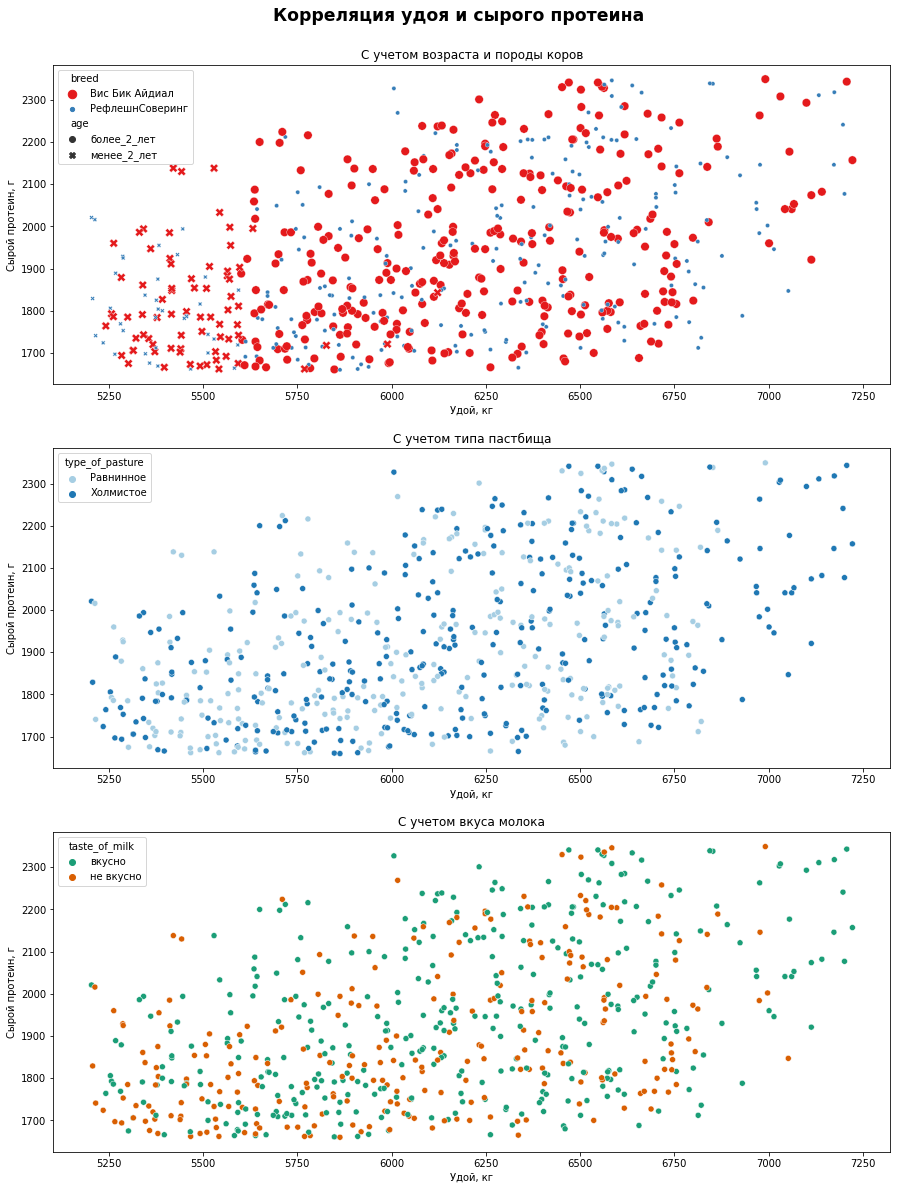

In [48]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize = (15,20))

sns.scatterplot(
    data = df_main,
    x = 'milk_yield',
    y = 'raw_protein',
    hue = 'breed',
    size = 'breed',
    style = 'age',
    palette = 'Set1',
    ax=axs[0]
)
axs[0].set(title = 'C учетом возраста и породы коров')
axs[0].set(xlabel = 'Удой, кг')
axs[0].set(ylabel = 'Сырой протеин, г')

sns.scatterplot(
    data = df_main,
    x = 'milk_yield',
    y = 'raw_protein',
    hue = 'type_of_pasture',
    palette = 'Paired',
    ax=axs[1]
)
axs[1].set(title = 'C учетом типа пастбища')
axs[1].set(xlabel = 'Удой, кг')
axs[1].set(ylabel = 'Сырой протеин, г')

sns.scatterplot(
    data = df_main,
    x = 'milk_yield',
    y = 'raw_protein',
    hue = 'taste_of_milk',
    palette = 'Dark2',
    ax=axs[2]
)
axs[2].set(title = 'C учетом вкуса молока')
axs[2].set(xlabel = 'Удой, кг')
axs[2].set(ylabel = 'Сырой протеин, г')

fig.suptitle('Корреляция удоя и сырого протеина', fontsize = 'xx-large', fontweight = 600, y=0.92)
plt.show()

**ВЫВОД:**
Корреляция удоя и сырого протеина средняя, положительная и равна 0.45. Зависимость от породы коров, типа пастбища и вкуса молока также отсутствует, однако, более высокий удой и сырой протеин наблюдается у коров старше 2 лет.

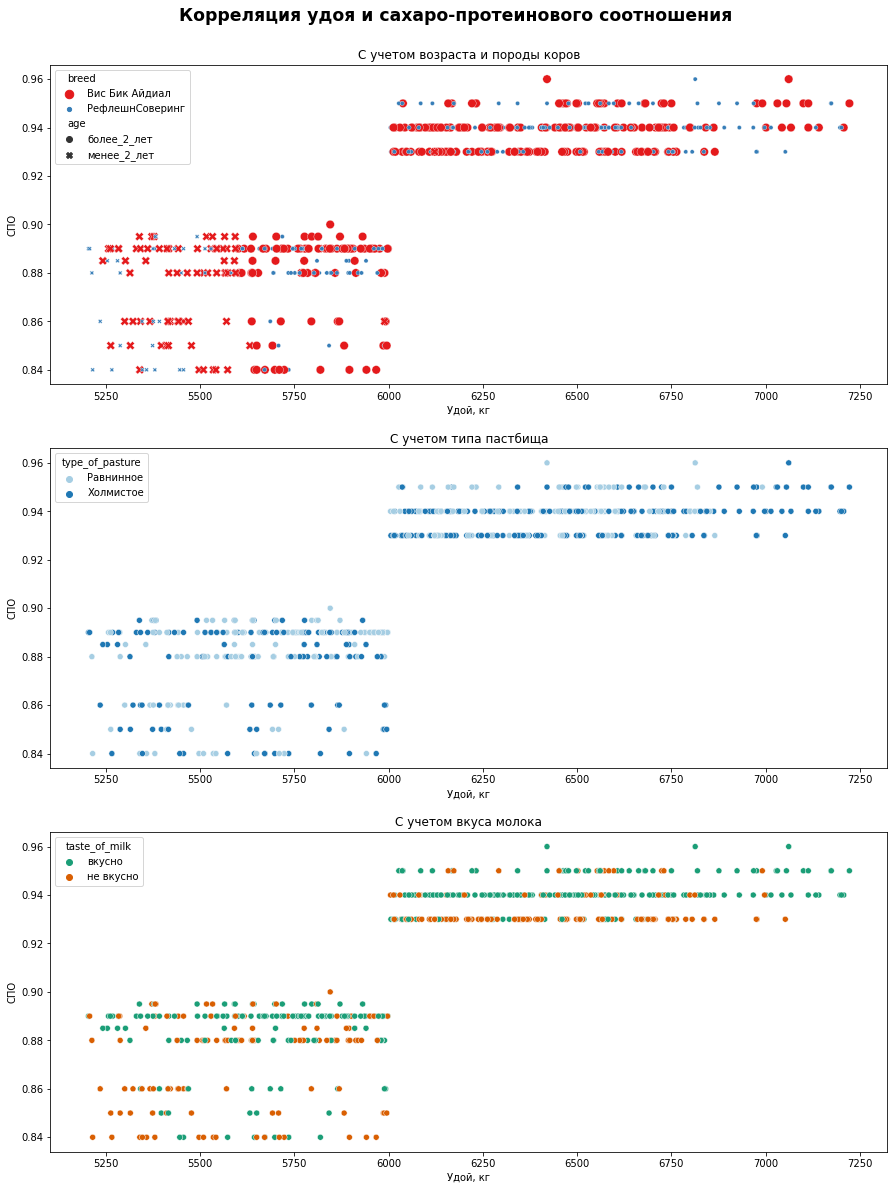

In [49]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize = (15,20))

sns.scatterplot(
    data = df_main,
    x = 'milk_yield',
    y = 's_p_ratio',
    hue = 'breed',
    size = 'breed',
    style = 'age',
    palette = 'Set1',
    ax=axs[0]
)
axs[0].set(title = 'C учетом возраста и породы коров')
axs[0].set(xlabel = 'Удой, кг')
axs[0].set(ylabel = 'СПО')

sns.scatterplot(
    data = df_main,
    x = 'milk_yield',
    y = 's_p_ratio',
    hue = 'type_of_pasture',
    palette = 'Paired',
    ax=axs[1]
)
axs[1].set(title = 'C учетом типа пастбища')
axs[1].set(xlabel = 'Удой, кг')
axs[1].set(ylabel = 'СПО')

sns.scatterplot(
    data = df_main,
    x = 'milk_yield',
    y = 's_p_ratio',
    hue = 'taste_of_milk',
    palette = 'Dark2',
    ax=axs[2]
)
axs[2].set(title = 'C учетом вкуса молока')
axs[2].set(xlabel = 'Удой, кг')
axs[2].set(ylabel = 'СПО')

fig.suptitle('Корреляция удоя и сахаро-протеинового соотношения', fontsize = 'xx-large', fontweight = 600, y=0.92)
plt.show()

**ВЫВОД:**
Корреляция удоя и сахаро-протеинового соотношения сильная, положительная и равна 0.81. Зависимость нелинейная. Зависимость от породы коров, типа пастбища и вкуса молока также отсутствует, однако, более высокий удой и СПО наблюдается у коров старше 2 лет.

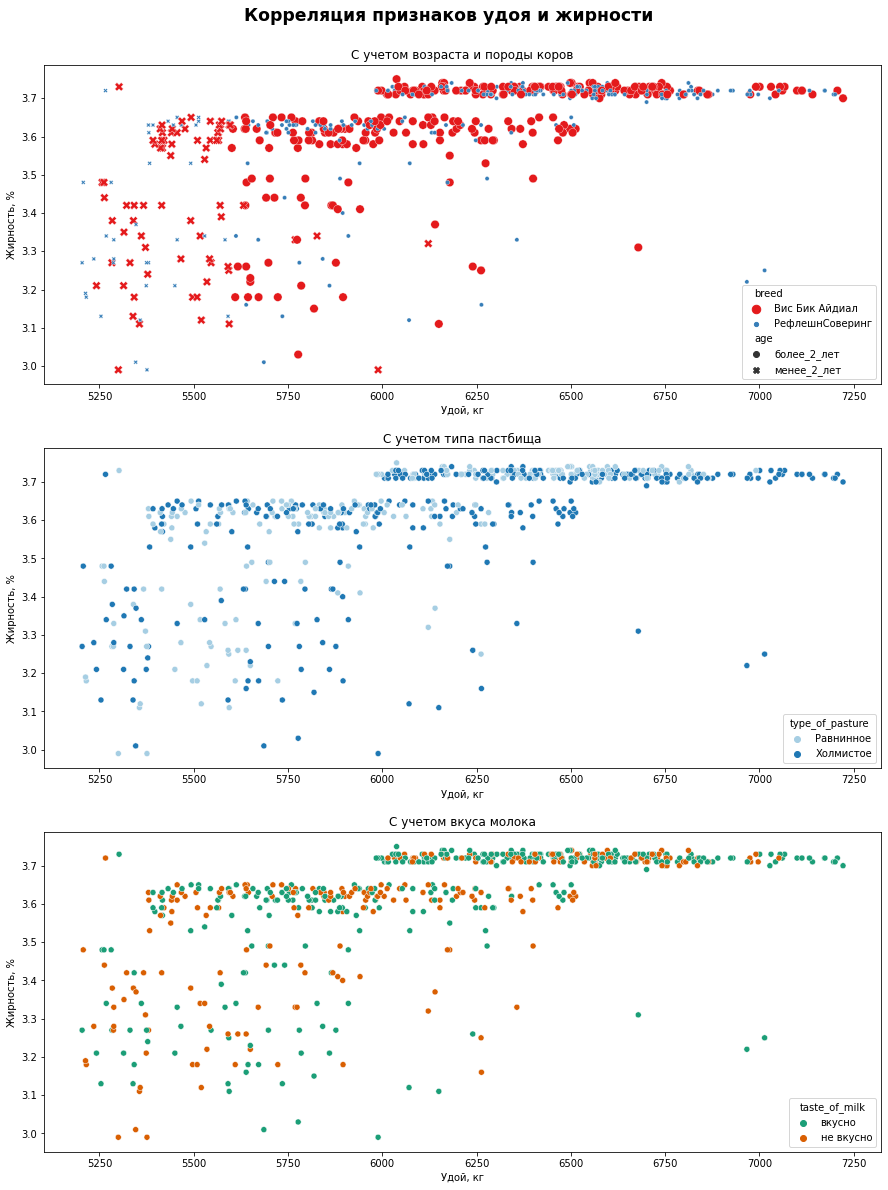

In [50]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize = (15,20))

sns.scatterplot(
    data = df_main,
    x = 'milk_yield',
    y = 'fat_content',
    hue = 'breed',
    size = 'breed',
    style = 'age',
    palette = 'Set1',
    ax=axs[0]
)
axs[0].set(title = 'C учетом возраста и породы коров')
axs[0].set(xlabel = 'Удой, кг')
axs[0].set(ylabel = 'Жирность, %')

sns.scatterplot(
    data = df_main,
    x = 'milk_yield',
    y = 'fat_content',
    hue = 'type_of_pasture',
    palette = 'Paired',
    ax=axs[1]
)
axs[1].set(title = 'C учетом типа пастбища')
axs[1].set(xlabel = 'Удой, кг')
axs[1].set(ylabel = 'Жирность, %')

sns.scatterplot(
    data = df_main,
    x = 'milk_yield',
    y = 'fat_content',
    hue = 'taste_of_milk',
    palette = 'Dark2',
    ax=axs[2]
)
axs[2].set(title = 'C учетом вкуса молока')
axs[2].set(xlabel = 'Удой, кг')
axs[2].set(ylabel = 'Жирность, %')

fig.suptitle('Корреляция признаков удоя и жирности', fontsize = 'xx-large', fontweight = 600, y=0.92)
plt.show()

**ВЫВОД:**
Корреляция удоя и жирности средняя, положительная и равна 0.6. Зависимость от породы коров, типа пастбища и вкуса молока также отсутствует, более высокий удой наблюдается у коров старше 2 лет. Жирность не имеет сильной зависимости от возраста коров.

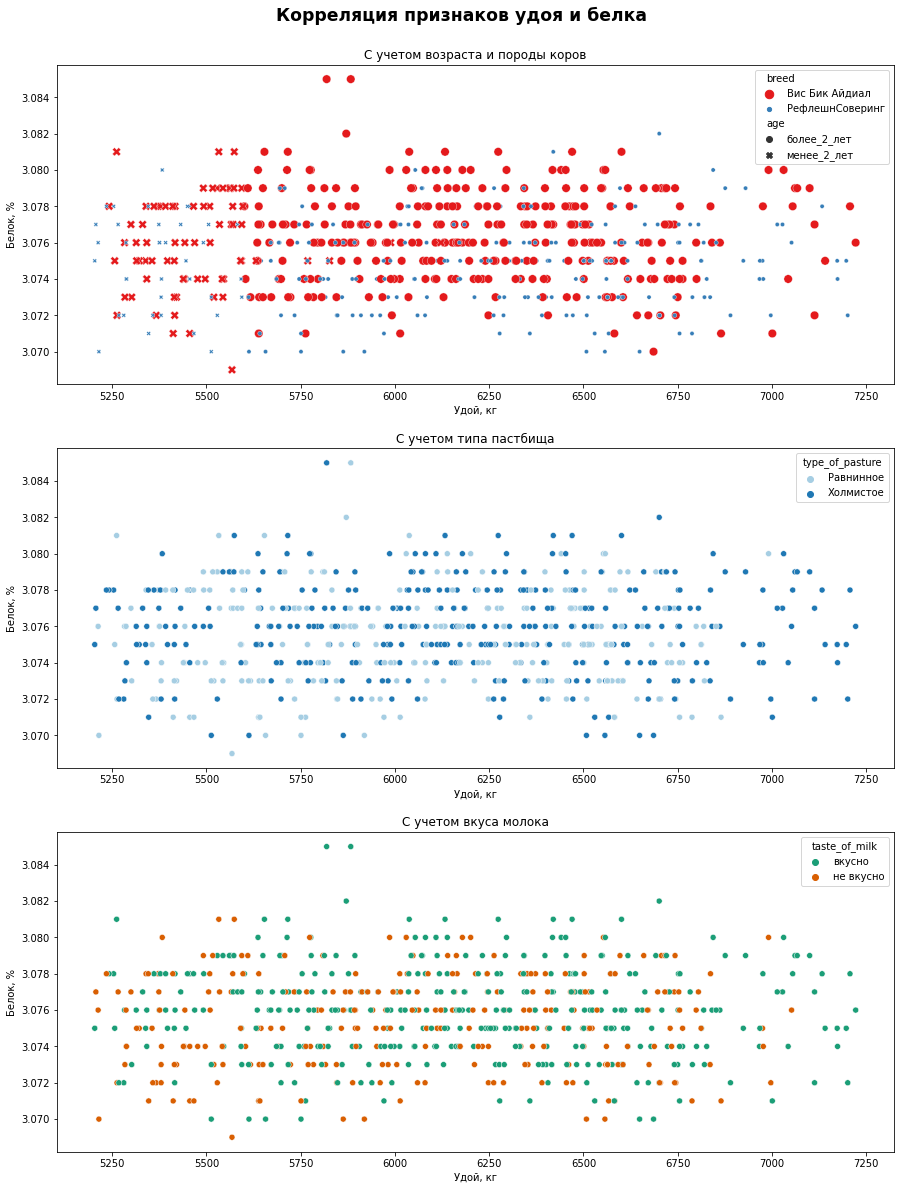

In [51]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize = (15,20))

sns.scatterplot(
    data = df_main,
    x = 'milk_yield',
    y = 'protein',
    hue = 'breed',
    size = 'breed',
    style = 'age',
    palette = 'Set1',
    ax=axs[0]
)
axs[0].set(title = 'C учетом возраста и породы коров')
axs[0].set(xlabel = 'Удой, кг')
axs[0].set(ylabel = 'Белок, %')

sns.scatterplot(
    data = df_main,
    x = 'milk_yield',
    y = 'protein',
    hue = 'type_of_pasture',
    palette = 'Paired',
    ax=axs[1]
)
axs[1].set(title = 'C учетом типа пастбища')
axs[1].set(xlabel = 'Удой, кг')
axs[1].set(ylabel = 'Белок, %')

sns.scatterplot(
    data = df_main,
    x = 'milk_yield',
    y = 'protein',
    hue = 'taste_of_milk',
    palette = 'Dark2',
    ax=axs[2]
)
axs[2].set(title = 'C учетом вкуса молока')
axs[2].set(xlabel = 'Удой, кг')
axs[2].set(ylabel = 'Белок, %')

fig.suptitle('Корреляция признаков удоя и белка', fontsize = 'xx-large', fontweight = 600, y=0.92)
plt.show()

**ВЫВОД:**
Корреляция удоя и белка очень слабая и равна 0.003. Зависимость от породы коров, типа пастбища и вкуса молока также отсутствует, более высокий удой наблюдается у коров старше 2 лет. Содержание белка не имеет сильной зависимости от возраста коров.

**ВЫВОД ПО КОРРЕЛЯЦИОННОМУ АНАЛИЗУ ДАННЫХ:**


- Корреляция удоя и энергетической кормовой единицы высокая, положительная и равна 0.77. Зависимость от породы коров, типа пастбища и вкуса молока отсутствует, однако, более высокий удой и ЭКЕ наблюдается у коров старше 2 лет.

- Корреляция удоя и сырого протеина средняя, положительная и равна 0.45. Зависимость от породы коров, типа пастбища и вкуса молока также отсутствует, однако, более высокий удой и сырой протеин наблюдается у коров старше 2 лет.

- Корреляция удоя и сахаро-протеинового соотношения сильная, положительная и равна 0.81. Зависимость нелинейная.Зависимость от породы коров, типа пастбища и вкуса молока также отсутствует, однако, более высокий удой и СПО наблюдается у коров старше 2 лет.

- Корреляция удоя и жирности средняя, положительная и равна 0.6. Зависимость от породы коров, типа пастбища и вкуса молока также отсутствует, более высокий удой наблюдается у коров старше 2 лет. Жирность не имеет сильной зависимости от возраста коров.

- Корреляция удоя и белка очень слабая и равна 0.003. Зависимость от породы коров, типа пастбища и вкуса молока также отсутствует, более высокий удой наблюдается у коров старше 2 лет. Содержание белка не имеет сильной зависимости от возраста коров.


Линейная взаимосвязь наблюдается между целевым признаком - Удой и входным признаком - ЭКЕ (Энергетическая кормовая единица).С прочими признаками связь нелинейная.


Мультиколлинеарность между входными признаками не наблюдается, т.к. значения коэффициента корреляции от 0.9 до 0.95 по модулю отсутствуют.


## 6. Обучение модели линейной регрессии

### **6.1 Обучение первой модели простой линейной регрессии**

Целевой признак: 
- Удой,кг


Входные признаки:
- ЭКЕ (Энергетическая кормовая единица)
- Сырой протеин, г
- СПО (Сахаро-протеиновое соотношение)
- Порода коровы
- Тип пастбища
- Порода папы быка 
- Возраст

Исключим признаки, влияющие на качественные характеристики молока, а не на удой:
- Уникальный идентификатор коровы
- Жирность,%
- Белок,% 
- Вкус молока 

In [52]:
X = df_main.drop(['milk_yield', 'id','fat_content', 'protein', 'taste_of_milk'], axis = 1)
y = df_main['milk_yield']

Рзаделим датафрейм на выборки:

In [53]:
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

Проведем кодирование категориальных признаков и масштабирование количественных признаков:

In [54]:
num_col_names = ['energy_feed_unit', 'raw_protein', 's_p_ratio']
cat_col_names = ['breed', 'type_of_pasture', 'breed_dad_bull', 'age' ]

In [55]:
encoder = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Создание и обучение модели линейной регрессии:

In [57]:
model_lr = LinearRegression() 
model_lr.fit(X_train, y_train)

LinearRegression()

In [58]:
predictions = model_lr.predict(X_test)

Оценим качество модели на тестовой выборке: рассчитаем R², проанализируйте остатки с помощью графиков.

In [59]:
r2_1 = r2_score(y_test, predictions) 
print("Коэффициент детерминации R² =", r2_1)

Коэффициент детерминации R² = 0.7844078173416967


Проведем анализ остатков:

In [60]:
residuals = y_test - predictions

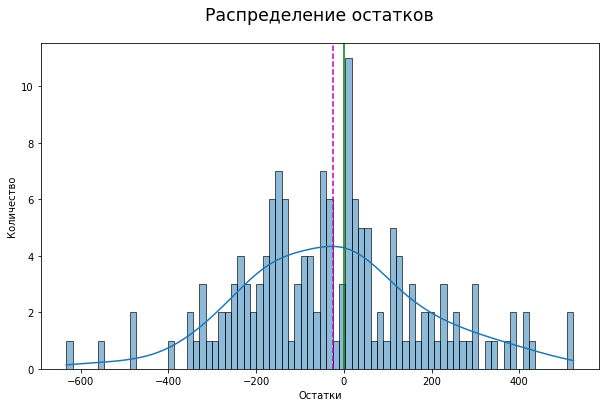

In [61]:
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins = 80, kde=True)
plt.axvline(residuals.mean(), color = 'm', linestyle = '--')
plt.axvline(x=0, color = 'g')
plt.title('Распределение остатков', fontsize = 'xx-large', fontweight = 500, y = 1.05)  
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.show()

На графике распределения остатков наблюдаем асимметричное нормальное распределение со смещением влево. Модель даёт слишком большие предсказания, её прогнозы больше истинных значений.

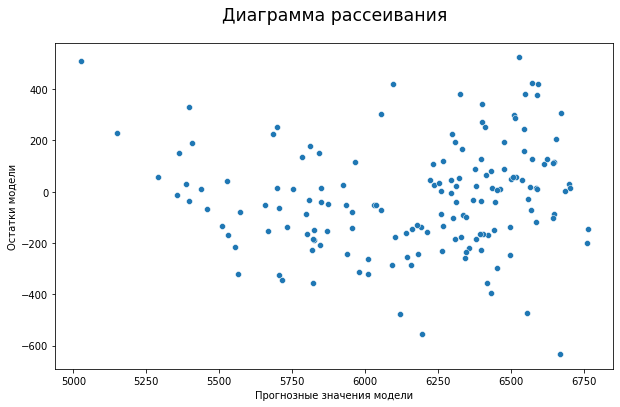

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = predictions, y = residuals)
plt.title('Диаграмма рассеивания' , fontsize = 'xx-large', fontweight = 500, y = 1.05)
plt.xlabel('Прогнозные значения модели')
plt.ylabel('Остатки модели')
plt.show()

На диаграмме рассеивания наблюдается нелинейность распределения остатков. Для прогнозируемых значений от 6000 и выше разброс остатков шире.

***Метрики первой модели:***

In [63]:
mse_1 = mean_squared_error(y_test, predictions) 
print("Среднеквадратичная ошибка =", mse_1)

Среднеквадратичная ошибка = 43887.015009660514


In [64]:
rmse_1 = mean_squared_error(y_test, predictions, squared = False) 
print("Корень среднеквадратичной ошибки", rmse_1)

Корень среднеквадратичной ошибки 209.4922791170608


In [65]:
mae_1 = mean_absolute_error(y_test, predictions) 
print("Средняя абсолютная ошибка", mae_1)

Средняя абсолютная ошибка 164.24194463474925


**ВЫВОД:**

Коэффициент детерминации R² = 0.78

С учетом того, что чем ближе коэффициент детеминации к единице, тем лучше обобщающая способность модели, можно сделать вывод, что наша модель делает хороший прогноз, однако, её можно улучшить.

На графике распределения остатков наблюдаем асимметричное нормальное распределение со смещением влево. Модель даёт слишком большие предсказания, её прогнозы больше истинных значений.

На диаграмме рассеивания наблюдается нелинейность распределения остатков. Для прогнозируемых значений от 6000 и выше разброс остатков шире.

Требуется улучшение модели.

## 6.2 Обучение второй модели простой линейной регрессии

Показатели СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём значение СПО 0.92 можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав эту границу.

In [66]:
df_main.loc[df_main['s_p_ratio'] >= 0.92, 's_p_ratio'] = 1
df_main.loc[df_main['s_p_ratio'] < 0.92, 's_p_ratio'] = 0

In [67]:
df_main['s_p_ratio'].unique()

array([0., 1.])

Введем новый признак ЭКЕ в квадрате:

In [68]:
df_main['efu_sq'] = df_main['energy_feed_unit']**2

In [69]:
X = df_main.drop(['milk_yield','id', 'fat_content', 'protein', 'taste_of_milk', 'energy_feed_unit'], axis = 1)
y = df_main['milk_yield']

Рзаделим датафрейм на выборки:

In [70]:
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

Проведем кодирование категориальных признаков и масштабирование количественных признаков:

In [71]:
num_col_names = ['efu_sq', 'raw_protein']
cat_col_names = ['s_p_ratio', 'breed', 'type_of_pasture', 'breed_dad_bull', 'age']

In [72]:
encoder = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Создание и обучение модели линейной регрессии:

In [74]:
model_lr = LinearRegression() 
model_lr.fit(X_train, y_train)

LinearRegression()

In [75]:
predictions = model_lr.predict(X_test)

Оценим качество модели на тестовой выборке: рассчитаем R², проанализируйте остатки с помощью графиков.

In [76]:
r2_2 = r2_score(y_test, predictions) 
print("Коэффициент детерминации R² =", r2_2)

Коэффициент детерминации R² = 0.8180879926867504


Значение коэффициента увеличилось незначительно. С 0,78 до 0,82.

Проведем анализ остатков:

In [77]:
residuals = y_test - predictions

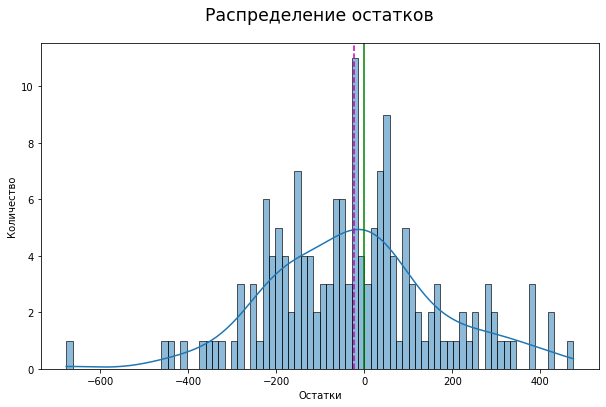

In [78]:
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins = 80, kde=True)
plt.axvline(residuals.mean(), color = 'm', linestyle = '--')
plt.axvline(x=0, color = 'g')
plt.title('Распределение остатков', fontsize = 'xx-large', fontweight = 500, y = 1.05)  
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.show()

На графике распределения остатков наблюдаем асимметричное нормальное распределение со смещением влево. Модель даёт слишком большие предсказания, её прогнозы больше истинных значений.

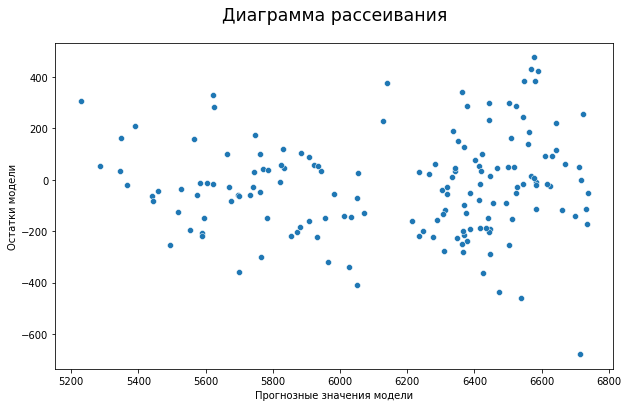

In [79]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = predictions, y = residuals)
plt.title('Диаграмма рассеивания' , fontsize = 'xx-large', fontweight = 500, y = 1.05)
plt.xlabel('Прогнозные значения модели')
plt.ylabel('Остатки модели')
plt.show()

На диаграмме рассеивания всё ещё наблюдается нелинейность распределения остатков. Однако,разброс стал равномернее.

***Метрики второй модели:***

In [80]:
mse_2 = mean_squared_error(y_test, predictions) 
print("Среднеквадратичная ошибка =", mse_2)

Среднеквадратичная ошибка = 37030.911311136915


In [81]:
rmse_2 = mean_squared_error(y_test, predictions, squared = False) 
print("Корень среднеквадратичной ошибки", rmse_2)

Корень среднеквадратичной ошибки 192.43417396901444


In [82]:
mae_2 = mean_absolute_error(y_test, predictions) 
print("Средняя абсолютная ошибка", mae_2)

Средняя абсолютная ошибка 149.03965222364596


**ВЫВОД:**

Коэффициент детерминации R² = 0.82. Незначительно увеличилася по сравнению с первой моделью.

На графике распределения остатков всё ещё есть асимметричное нормальное распределение со смещением влево. Модель даёт слишком большие предсказания, её прогнозы больше истинных значений.

На диаграмме рассеивания всё ещё наблюдается нелинейность распределения остатков. Однако распределение стало более равномерным.

Требуется улучшение модели.

## 6.2 Обучение третьей модели простой линейной регрессии

Добавим в данные о стаде фермера и имена папы каждой коровы.

In [83]:
df_main = df_main.merge(df_dad, on = 'id', how = 'left')

In [84]:
df_main.head()

,id,milk_yield,energy_feed_unit,raw_protein,s_p_ratio,breed,type_of_pasture,breed_dad_bull,fat_content,protein,taste_of_milk,age,efu_sq,name_dad_bull
0,1,5863,14.2,1743,0.0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,Буйный
1,2,5529,12.8,2138,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84,Соловчик
2,3,5810,14.0,1854,0.0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00,Барин
3,4,5895,12.4,2012,0.0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,Буйный
4,5,5302,12.8,1675,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84,Барин


In [85]:
X = df_main.drop(['milk_yield','id', 'fat_content', 'protein', 'taste_of_milk', 'energy_feed_unit'], axis = 1)
y = df_main['milk_yield']

Рзаделим датафрейм на выборки:

In [86]:
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

Проведем кодирование категориальных признаков и масштабирование количественных признаков:

In [87]:
num_col_names = ['efu_sq', 'raw_protein']
cat_col_names = ['s_p_ratio', 'breed', 'type_of_pasture', 'breed_dad_bull', 'age', 'name_dad_bull']

In [88]:
encoder = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [89]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Создание и обучение модели линейной регрессии:

In [90]:
model_lr = LinearRegression() 
model_lr.fit(X_train, y_train)

LinearRegression()

In [91]:
predictions = model_lr.predict(X_test)

Оценим качество модели на тестовой выборке: рассчитаем R², проанализируйте остатки с помощью графиков.

In [92]:
r2_3 = r2_score(y_test, predictions) 
print("Коэффициент детерминации R² =", r2_3)

Коэффициент детерминации R² = 0.8247542745210406


Значение коэффициента увеличилось незначительно. С 0,818 до 0,825.

Проведем анализ остатков:

In [93]:
residuals = y_test - predictions

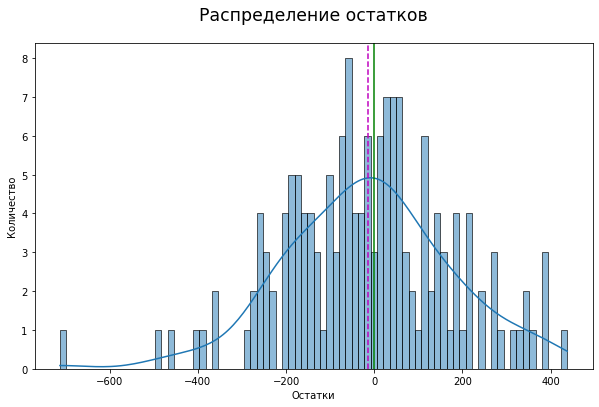

In [94]:
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins = 80, kde=True)
plt.axvline(residuals.mean(), color = 'm', linestyle = '--')
plt.axvline(x=0, color = 'g')
plt.title('Распределение остатков', fontsize = 'xx-large', fontweight = 500, y = 1.05)  
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.show()

На графике распределения остатков наблюдаем асимметричное нормальное распределение со смещением влево. Модель даёт прогнозы больше истинных значений.

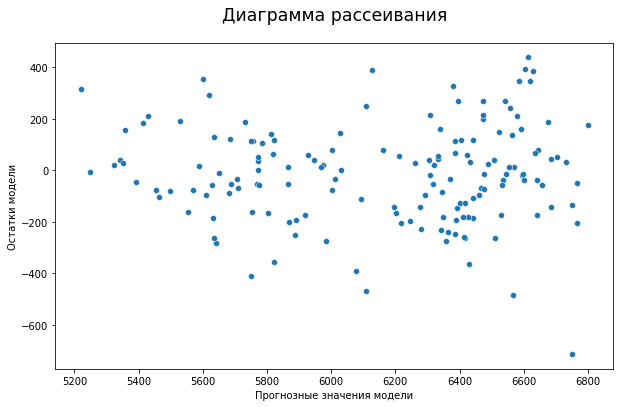

In [95]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = predictions, y = residuals)
plt.title('Диаграмма рассеивания' , fontsize = 'xx-large', fontweight = 500, y = 1.05)
plt.xlabel('Прогнозные значения модели')
plt.ylabel('Остатки модели')
plt.show()

На диаграмме рассеивания разброс стал равномернее.

***Метрики третьей модели:***

In [96]:
mse_3 = mean_squared_error(y_test, predictions) 
print("Среднеквадратичная ошибка =", mse_3)

Среднеквадратичная ошибка = 35673.889886181954


In [97]:
rmse_3 = mean_squared_error(y_test, predictions, squared = False) 
print("Корень среднеквадратичной ошибки", rmse_3)

Корень среднеквадратичной ошибки 188.8753289505592


In [98]:
mae_3 = mean_absolute_error(y_test, predictions) 
print("Средняя абсолютная ошибка", mae_3)

Средняя абсолютная ошибка 146.1630244536232


**ВЫВОД:**

Коэффициент детерминации R² = 0.825. Незначительно увеличилася по сравнению с второй моделью.

На графике распределения остатков всё ещё есть асимметричное нормальное распределение со смещением влево. Модель даёт прогнозы больше истинных значений.

На диаграмме рассеивания всё ещё наблюдается нелинейность распределения остатков. Однако распределение стало более равномерным.


Сравним метрики:

In [99]:
metrics = {'Модель': ['Первая', 'Вторая', 'Третья'],
           'MSE': [mse_1, mse_2, mse_3], 
           'RMSE': [rmse_1, rmse_2, rmse_3],
           'MAE': [mae_1, mae_2, mae_3], 
           'R²': [r2_1, r2_2, r2_3]} 
df = pd.DataFrame(metrics) 
print(df) 

   Модель           MSE        RMSE         MAE        R²
0  Первая  43887.015010  209.492279  164.241945  0.784408
1  Вторая  37030.911311  192.434174  149.039652  0.818088
2  Третья  35673.889886  188.875329  146.163024  0.824754


**ВЫВОД:**

Анализ метрик трех моделей показал, что наилучший прогноз делает третья модель. 

С её помощью спрогнозируем удой коров, которых фермер хочет купить. 

Добавим в датафрейм с данными о коровах «ЭкоФермы» недостающие признаки:

- ЭКЕ (Энергетическая кормовая единица), 
- Сырой протеин, г
- СПО (Сахаро-протеиновое соотношение)

Возьмем средние значения каждого из признаков и увеличим их на 5%.

In [100]:
df_columns = ['energy_feed_unit', 'raw_protein', 's_p_ratio']

for i in df_columns:
    df_cow_boy[i] = df_main[i].mean()*1.05

In [101]:
df_cow_boy['efu_sq'] = df_cow_boy['energy_feed_unit']**2


In [102]:
df_cow_boy.loc[df_cow_boy['s_p_ratio'] >= 0.92, 's_p_ratio'] = 1
df_cow_boy.loc[df_cow_boy['s_p_ratio'] < 0.92, 's_p_ratio'] = 0

In [103]:
df_cow_boy.head()

,cb_breed,cb_type_of_pasture,cb_breed_dad_bull,cb_name_dad_bull,current_fat_content,current_protein,cb_age,energy_feed_unit,raw_protein,s_p_ratio,efu_sq
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.0,233.361138
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.0,233.361138
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.0,233.361138
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.0,233.361138
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.0,233.361138


Выполним подготовку данных и получим прогноз удоя коров «ЭкоФермы», используя третью модель.

In [104]:
X = df_cow_boy.drop(['current_fat_content','current_protein', 'energy_feed_unit'], axis = 1)
X = X[['raw_protein','s_p_ratio','cb_breed', 'cb_type_of_pasture', 'cb_breed_dad_bull', 'cb_age', 'efu_sq', 'cb_name_dad_bull']]

Проведем кодирование категориальных признаков и масштабирование количественных признаков:

In [105]:
num_col_names = ['efu_sq', 'raw_protein']
cat_col_names = ['s_p_ratio', 'cb_breed', 'cb_type_of_pasture', 'cb_breed_dad_bull', 'cb_age', 'cb_name_dad_bull']

In [106]:
X_ohe = encoder.transform(X[cat_col_names])

In [107]:
encoder_col_names = encoder.get_feature_names()

In [108]:
X_scaled = scaler.transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X = pd.concat([X_ohe, X_scaled], axis=1)

In [109]:
predictions = model_lr.predict(X)

In [110]:
df_cow_boy['milk_yield_pred'] = predictions
df_cow_boy = df_cow_boy.sort_values(by = 'milk_yield_pred', ascending = False).reset_index(drop=True)
df_cow_boy

,cb_breed,cb_type_of_pasture,cb_breed_dad_bull,cb_name_dad_bull,current_fat_content,current_protein,cb_age,energy_feed_unit,raw_protein,s_p_ratio,efu_sq,milk_yield_pred
0,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.276162,2019.947532,0.0,233.361138,6264.149097
1,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.0,233.361138,6256.139468
2,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.276162,2019.947532,0.0,233.361138,6256.139468
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.0,233.361138,6239.309548
4,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.276162,2019.947532,0.0,233.361138,6239.309548
5,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.0,233.361138,6217.479908
6,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,15.276162,2019.947532,0.0,233.361138,6217.479908
7,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.0,233.361138,6188.366237
8,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,0.0,233.361138,6071.600389
9,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,15.276162,2019.947532,0.0,233.361138,6071.600389


**ВЫВОД:**

C помощью третьей модели получен прогноз удоя коров «ЭкоФермы».

## 7. Обучение модели логистической регрессии

Целевой признак: 
- Вкус молока

In [111]:
df_main['taste_of_milk'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [112]:
df_main.loc[df_main['taste_of_milk'] == 'вкусно','taste_of_milk'] = 1
df_main.loc[df_main['taste_of_milk'] == 'не вкусно','taste_of_milk'] = 0

df_main['taste_of_milk'] = df_main['taste_of_milk'].astype('int')

In [113]:
df_main.head()

,id,milk_yield,energy_feed_unit,raw_protein,s_p_ratio,breed,type_of_pasture,breed_dad_bull,fat_content,protein,taste_of_milk,age,efu_sq,name_dad_bull
0,1,5863,14.2,1743,0.0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,более_2_лет,201.64,Буйный
1,2,5529,12.8,2138,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,менее_2_лет,163.84,Соловчик
2,3,5810,14.0,1854,0.0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,более_2_лет,196.00,Барин
3,4,5895,12.4,2012,0.0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,более_2_лет,153.76,Буйный
4,5,5302,12.8,1675,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,менее_2_лет,163.84,Барин


In [114]:
X = df_main.drop(columns=['milk_yield', 'taste_of_milk', 'id', 'energy_feed_unit'], axis = 1)
y = df_main['taste_of_milk']

Разобъем данные на тренировочную и тестовую выборки:

In [115]:
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

Проведем кодирование категориальных признаков и масштабирование количественных признаков:

In [116]:
cat_col_names = ['s_p_ratio', 'breed', 'type_of_pasture', 'breed_dad_bull', 'age', 'name_dad_bull']
num_col_names = ['raw_protein', 'fat_content', 'protein', 'efu_sq']

In [117]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names]) 

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [118]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names]) 

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Обучим модель логистической регрессии на подготовленных данных^

In [119]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)

In [120]:
predictions = clf.predict(X_test)

Оценим качество модели на тестовой выборке: рассчитаем метрики accuracy, recall, precision:

In [121]:
accuracy = accuracy_score(y_test, predictions)
print(f'Значение метрики accuracy: {accuracy:.2f}')

Значение метрики accuracy: 0.63


Модель ошибается в 38% случаев.

In [122]:
recall = recall_score(y_test, predictions)
print(f'Значение метрики recall: {recall:.2f}')

Значение метрики recall: 0.86


In [123]:
precision_score(y_test, predictions)
# код ревьюера
precision = precision_score(y_test, predictions)
print(f'Значение метрики precision: {precision:.2f}')

Значение метрики precision: 0.62


Построим матрицу ошибок:

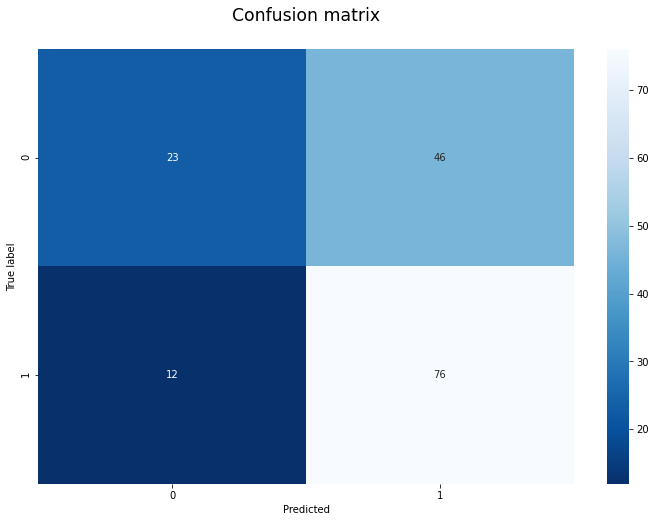

In [124]:
plt.figure(figsize=(12,8))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Confusion matrix', fontsize = 'xx-large', fontweight = 500, y = 1.05)
plt.xlabel('Predicted')
plt.ylabel('True label')
plt.show()

**ВЫВОД:**

Accuracy показывает, скольким объектам модель смогла правильно присвоить класс. Наша модель ошибается в 38% случаев.

False Positive (ошибка первого рода) - 47, а False Negative (ошибка второго рода) - 12. В нашем случае критичнее всего ошибка первого рода (False Positive), так как главное для заказчика — вкусное молоко. Ложноположительный результат моделирования приведет к покупке коровы с невкусным молоком. В условиях текущей задачи это недопустимо. Необходимо свести критичную ошибку к нулю. 

Precision показывает точность, с которой модель присваивает объектам класс 1, то есть получает результат типа Positive. Чтобы не будет допускать ошибок первого рода, precision должен быть равен 100%. В нашем случае precision 62%. Для решения текущей задачи модели эта метрика важнее.

Recell измеряет, смогла ли модель классификации присвоить класс 1 всем объектам этого класса. У нашей модели она равна 86%.

Сведем критичную ошибку к нулю: для этого изменим порог принадлежности к классам:

In [125]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head()) 

     y_valid   y_proba
85         1  0.861369
110        1  0.842813
66         1  0.841492
51         1  0.839685
8          1  0.817310


In [126]:
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 100,endpoint=False)]
print(thresholds) 

[0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.96, 0.97, 0.98, 0.99]


In [127]:
precision = []

for i in thresholds:
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)
    precision = (precision_score(data['y_valid'], data['y_pred_'+str(i)])).round(2)
    if precision == 1:
        break
print(f'Precision = {precision} при пороге {i}')
   

Precision = 1.0 при пороге 0.81


In [128]:
predictions = clf.predict_proba(X_test)[:,1]>=0.81

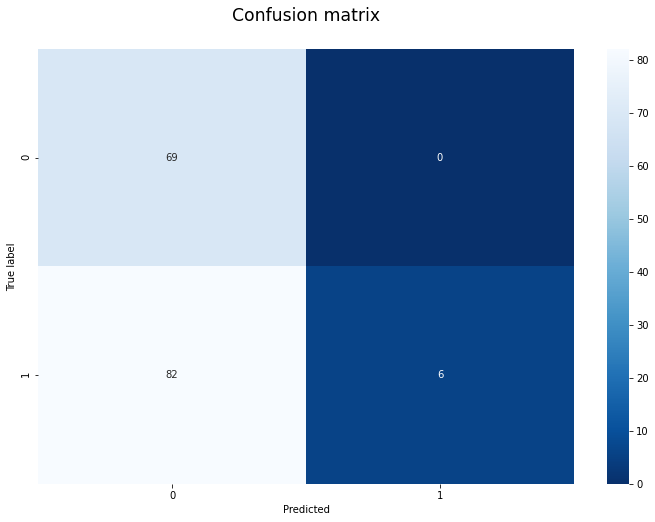

In [129]:
plt.figure(figsize=(12,8))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Confusion matrix', fontsize = 'xx-large', fontweight = 500, y = 1.05)
plt.xlabel('Predicted')
plt.ylabel('True label')
plt.show()

При пороге 0,81 ложноположительных предсказаний нет.

Оценим качество модели на тестовой выборке: рассчитаем метрики accuracy, recall, precision:

In [130]:
accuracy_score(y_test, predictions)


0.47770700636942676

In [131]:
recall_score(y_test, predictions)

0.06818181818181818

In [132]:
precision_score(y_test, predictions)

1.0

Модель ошибается в 52% случаев. Делает монго ложноотрицательных прогнозов, но нет ложноположительных, что и требовалось для решения задачи по подбору буренок с вкусным молоком.

С помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить.

In [133]:
df_cow_boy

,cb_breed,cb_type_of_pasture,cb_breed_dad_bull,cb_name_dad_bull,current_fat_content,current_protein,cb_age,energy_feed_unit,raw_protein,s_p_ratio,efu_sq,milk_yield_pred
0,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.276162,2019.947532,0.0,233.361138,6264.149097
1,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.0,233.361138,6256.139468
2,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.276162,2019.947532,0.0,233.361138,6256.139468
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.0,233.361138,6239.309548
4,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.276162,2019.947532,0.0,233.361138,6239.309548
5,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.0,233.361138,6217.479908
6,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,15.276162,2019.947532,0.0,233.361138,6217.479908
7,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.0,233.361138,6188.366237
8,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,0.0,233.361138,6071.600389
9,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,15.276162,2019.947532,0.0,233.361138,6071.600389


In [134]:
X = df_cow_boy.drop(['milk_yield_pred', 'energy_feed_unit'], axis = 1)

Проведем кодирование категориальных признаков и масштабирование количественных признаков:

In [135]:
cat_col_names = ['s_p_ratio', 'cb_breed', 'cb_type_of_pasture', 'cb_breed_dad_bull', 'cb_age', 'cb_name_dad_bull']
num_col_names = ['current_fat_content', 'current_protein', 'raw_protein', 'efu_sq']

In [136]:
X_ohe = encoder.transform(X[cat_col_names]) 
encoder_col_names = encoder.get_feature_names()
X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)

In [137]:
X_scaled = scaler.transform(X[num_col_names]) 
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X_test = pd.concat([X_ohe, X_scaled], axis=1)

In [138]:
predictions = clf.predict_proba(X_test)[:,1]>=0.81

In [139]:
df_cow_boy['cb_taste_of_milk'] = predictions

In [140]:
df_cow_boy.loc[df_cow_boy['cb_taste_of_milk'] == True, 'cb_taste_of_milk'] = 'вкусно'
df_cow_boy.loc[df_cow_boy['cb_taste_of_milk'] == False, 'cb_taste_of_milk'] = 'не вкусно'

In [141]:
df_cow_boy.head()

,cb_breed,cb_type_of_pasture,cb_breed_dad_bull,cb_name_dad_bull,current_fat_content,current_protein,cb_age,energy_feed_unit,raw_protein,s_p_ratio,efu_sq,milk_yield_pred,cb_taste_of_milk
0,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.276162,2019.947532,0.0,233.361138,6264.149097,вкусно
1,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.0,233.361138,6256.139468,вкусно
2,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.276162,2019.947532,0.0,233.361138,6256.139468,вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.0,233.361138,6239.309548,вкусно
4,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.276162,2019.947532,0.0,233.361138,6239.309548,вкусно


## Итоговые выводы

*ВЫВОД ПО ПРЕДОБРАБОТКЕ ДАННЫХ:*

- Проведена замена наименований столбцов (приведение к нижнему регистру, одному языку, отсутствию пробелов);
- Объединены данные о стаде фермера и данные об именах папы каждой коровы в один датафрейм;
- Проведена проверка на явные дубликаты:
      В датафрейме с даннымии о стаде фермера 5 явных дубликатов. После их удаления число строк - 629;
      В датафрейм с даннымии о коровах «ЭкоФермы» 4 явных дубликата. После их удаления число строк - 16.
      
- Проведена проверка на неявные дубликаты:

      В датафрейме с даннымии о стаде фермера обнаружены  неявные дубликаты. Значения исправлены; 
      В датафрейм с даннымии о коровах «ЭкоФермы» нет неявных дубликатов.
    
- Пропусков нет;
- Типы данных в столбцах указаны корректно.


*ВЫВОД ПО ИССЛЕДОВАТЕЛЬСКОМУ АНАЛИЗУ ДАННЫХ:*

- Удой в стаде фермера на колеблется на уровне 5750 - 6501 кг. Медианное значение - 6132.5 кг. Выброс удален.
- ЭКЕ (Энергетическая кормовая единица) в стаде фермера 13.5 - 15.6. Медианное значение - 14.7. Выбросов нет.
- Уровень сырого протеина в молоке в стаде фермера находится в диапазоне 1771.7 - 2062.2 г. Медианное значение - 1888. Выбросов нет.
- Уровень СПО (Сахаро-протеиновое соотношение)в молоке коров стада фермера находится в диапазоне 0.89 - 0.94. Медианное значение - 0.93. Выбросов нет.
- Содержание жиров в молоке коров стада фермера находится в диапазоне 3.59 - 3.72 %. Медианное значение - 3.65%. Много значений от 3%. Однако, исключать их не будем, т.к. более низкие показатель жирности молока у достаточно большого числа коров влияют на итоговый показатель качества молока фермы.
- Содержание белков в молоке коров стада фермера имеет медианное значение - 3.076 %. Разброс значений не велик. Оставим без изменений.
- Порода Вис Бик Айдиал в стаде фермера представлена на 20% больше, чем Рефлешн Соверинг.
- На холмистых пастбищах паслось на 10% больше коров, чем на равнинных.
- Распределение по породам папы быка 50 на 50.
- Фермер оценил 60% коров, как дающих вкусное молоко, 40% - не вкусное.
- В стаде фермера 82,5% коров старше 2 лет.


*ВЫВОД ПО КОРРЕЛЯЦИОННОМУ АНАЛИЗУ ДАННЫХ:*

- Корреляция удоя и энергетической кормовой единицы высокая, положительная и равна 0.77. Зависимость от породы коров, типа пастбища и вкуса молока отсутствует, однако, более высокий удой и ЭКЕ наблюдается у коров старше 2 лет.

- Корреляция удоя и сырого протеина средняя, положительная и равна 0.45. Зависимость от породы коров, типа пастбища и вкуса молока также отсутствует, однако, более высокий удой и сырой протеин наблюдается у коров старше 2 лет.

- Корреляция удоя и сахаро-протеинового соотношения сильная, положительная и равна 0.81. Зависимость от породы коров, типа пастбища и вкуса молока также отсутствует, однако, более высокий удой и СПО наблюдается у коров старше 2 лет..

- Корреляция удоя и жирности средняя, положительная и равна 0.6. Зависимость от породы коров, типа пастбища и вкуса молока также отсутствует, более высокий удой наблюдается у коров старше 2 лет. Жирность не имеет сильной зависимости от возраста коров.

- Корреляция удоя и белка очень слабая и равна 0.003. Зависимость от породы коров, типа пастбища и вкуса молока также отсутствует, более высокий удой наблюдается у коров старше 2 лет. Содержание белка не имеет сильной зависимости от возраста коров.

- Линейная взаимосвязь наблюдается между целевым признаком - Удой и входным признаком - ЭКЕ (Энергетическая кормовая единица).С прочими признаками связь нелинейная.

- Мультиколлинеарность между входными признаками не наблюдается, т.к. значения коэффициента корреляции от 0.9 до 0.95 по модулю отсутствуют.

In [142]:
df_cow_boy_recom = df_cow_boy.loc[(df_cow_boy['milk_yield_pred'] > 6000) & (df_cow_boy['cb_taste_of_milk'] == 'вкусно')]

In [143]:
df_cow_boy_recom.shape

(12, 13)

In [144]:
df_cow_boy_recom

,cb_breed,cb_type_of_pasture,cb_breed_dad_bull,cb_name_dad_bull,current_fat_content,current_protein,cb_age,energy_feed_unit,raw_protein,s_p_ratio,efu_sq,milk_yield_pred,cb_taste_of_milk
0,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.276162,2019.947532,0.0,233.361138,6264.149097,вкусно
1,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.0,233.361138,6256.139468,вкусно
2,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.276162,2019.947532,0.0,233.361138,6256.139468,вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.0,233.361138,6239.309548,вкусно
4,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.276162,2019.947532,0.0,233.361138,6239.309548,вкусно
5,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.0,233.361138,6217.479908,вкусно
6,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,15.276162,2019.947532,0.0,233.361138,6217.479908,вкусно
7,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.0,233.361138,6188.366237,вкусно
8,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,0.0,233.361138,6071.600389,вкусно
9,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,15.276162,2019.947532,0.0,233.361138,6071.600389,вкусно


Разработанная модель машинного обучения спрогнозировала вкусное молоко с удоем более 6000 килограммов в год у 12 коров "Экофермы". Только их фермер может купить с минимальным риском для себя.
Для лучшего управления рисками и принятия объективного решения о покупке можно рекомендовать фермеру предоставить дополнительные данные о коровах своего стада и "Экофермы" для построения более точной модели.

*ВЫВОД ПО ОБУЧЕНИЮ МОДЕЛИ ЛИНЕЙНОЙ РЕГРЕССИИ:*

- Наибольший коэффициент детерминации R² = 0.825 у третьей модели.
- На графике распределения остатков асимметричное нормальное распределение со смещением влево. Модель даёт прогнозы больше истинных значений.
- На диаграмме рассеивания распределение остатков в третьей модели стало более равномерным.
- Анализ метрик трех моделей показал, что наилучший прогноз делает третья модель
- C помощью третьей модели получен прогноз удоя коров «ЭкоФермы».
- Для улучшения качества регрессионной модели признак СПО преобразован в категориальный бинарный признак, а так данные дополнены именами папы быка из дополнительного датафрейма.

*ВЫВОД ПО ОБУЧЕНИЮ МОДЕЛИ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ:*

Согласно метрики accuracy модель ошибается в 52% случаев. Делает много ложноотрицательных прогнозов(метрика recall), но нет ложноположительных (метрика precision), что и требовалось для решения задачи по подбору буренок с вкусным молоком. 
Эти метрики важны при анализе рисков и экономических расчетов.